In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams['font.size'] = 14

# plt.rcParams['figure.facecolor'] = '#00000000'

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Usefull information from Match_Data table

In [3]:
## Checking Our Files are avilable

# import os
# data_dir = '/content/drive/MyDrive/Colab Notebooks'
# os.listdir(data_dir)

In [4]:
c='IPL_Ball_by_Ball_2022.csv'
c2='IPL_Matches_2022.csv'
c3='matches.csv'

ball_data=pd.read_csv(c)
match_data=pd.read_csv(c2)
new_data=pd.read_csv(c3)

In [5]:
#shape and columns in the dataframe

print(match_data.shape,ball_data.shape,new_data.shape)

print("\n",match_data.columns)
print("\n",ball_data.columns)
print("\n",new_data.columns)

(59, 20) (14233, 17) (71, 20)

 Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

 Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

 Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')


In [6]:
# types of data/variables in the given Match dataset..

match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               59 non-null     int64  
 1   City             59 non-null     object 
 2   Date             59 non-null     object 
 3   Season           59 non-null     int64  
 4   MatchNumber      59 non-null     int64  
 5   Team1            59 non-null     object 
 6   Team2            59 non-null     object 
 7   Venue            59 non-null     object 
 8   TossWinner       59 non-null     object 
 9   TossDecision     59 non-null     object 
 10  SuperOver        59 non-null     object 
 11  WinningTeam      59 non-null     object 
 12  WonBy            59 non-null     object 
 13  Margin           59 non-null     int64  
 14  method           0 non-null      float64
 15  Player_of_Match  59 non-null     object 
 16  Team1Players     59 non-null     object 
 17  Team2Players     5

In [7]:
# summary statistics

match_data.describe()

,ID,Season,MatchNumber,Margin,method
count,5.900000e+01,59.0,59.000000,59.000000,0.0
mean,1.304076e+06,2022.0,30.000000,17.576271,NaN
std,1.717556e+01,0.0,17.175564,20.359022,NaN
min,1.304047e+06,2022.0,1.000000,3.000000,NaN
25%,1.304062e+06,2022.0,15.500000,6.000000,NaN
50%,1.304076e+06,2022.0,30.000000,8.000000,NaN
75%,1.304090e+06,2022.0,44.500000,19.000000,NaN
max,1.304105e+06,2022.0,59.000000,91.000000,NaN


In [8]:
# Data cleaning
match_data.isnull().any()

ID                 False
City               False
Date               False
Season             False
MatchNumber        False
Team1              False
Team2              False
Venue              False
TossWinner         False
TossDecision       False
SuperOver          False
WinningTeam        False
WonBy              False
Margin             False
method              True
Player_of_Match    False
Team1Players       False
Team2Players       False
Umpire1            False
Umpire2            False
dtype: bool

In [9]:
# sum of missing values in each column

match_data.isnull().sum()

ID                  0
City                0
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin              0
method             59
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
dtype: int64

In [10]:
# I found one column,which contains null and this column is not helpfull in our analysis 

## Drop Method column 

match_data.drop(['method'],axis=1,inplace=True)


In [11]:
match_data.isnull().sum()

ID                 0
City               0
Date               0
Season             0
MatchNumber        0
Team1              0
Team2              0
Venue              0
TossWinner         0
TossDecision       0
SuperOver          0
WinningTeam        0
WonBy              0
Margin             0
Player_of_Match    0
Team1Players       0
Team2Players       0
Umpire1            0
Umpire2            0
dtype: int64

# Lets look into ball to ball

In [12]:
ball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14233 entries, 0 to 14232
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 14233 non-null  int64 
 1   innings            14233 non-null  int64 
 2   overs              14233 non-null  int64 
 3   ballnumber         14233 non-null  int64 
 4   batter             14233 non-null  object
 5   bowler             14233 non-null  object
 6   non-striker        14233 non-null  object
 7   extra_type         844 non-null    object
 8   batsman_run        14233 non-null  int64 
 9   extras_run         14233 non-null  int64 
 10  total_run          14233 non-null  int64 
 11  non_boundary       14233 non-null  int64 
 12  isWicketDelivery   14233 non-null  int64 
 13  player_out         736 non-null    object
 14  kind               736 non-null    object
 15  fielders_involved  564 non-null    object
 16  BattingTeam        14233 non-null  objec

In [13]:
ball_data.isnull().sum()

ID                       0
innings                  0
overs                    0
ballnumber               0
batter                   0
bowler                   0
non-striker              0
extra_type           13389
batsman_run              0
extras_run               0
total_run                0
non_boundary             0
isWicketDelivery         0
player_out           13497
kind                 13497
fielders_involved    13669
BattingTeam              0
dtype: int64

In [14]:
match_data.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1304105,Mumbai,2022-05-12,2022,59,Chennai Super Kings,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5,DR Sams,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'RV Utha...","['Ishan Kishan', 'RG Sharma', 'DR Sams', 'Tila...",Chirra Ravikanthreddy,CB Gaffaney
1,1304104,Navi Mumbai,2022-05-11,2022,58,Rajasthan Royals,Delhi Capitals,"Dr DY Patil Sports Academy, Mumbai",Delhi Capitals,field,N,Delhi Capitals,Wickets,8,MR Marsh,"['YBK Jaiswal', 'JC Buttler', 'R Ashwin', 'D P...","['KS Bharat', 'DA Warner', 'MR Marsh', 'RR Pan...",NA Patwardhan,Nitin Menon


# Lets Start Analysis

# **Qn-01** 

## (i) How many matches was played in each city 

## (ii) Which stadium hosted max number of matches?
 






City
Mumbai         40
Pune           12
Navi Mumbai     7
Name: ID, dtype: int64


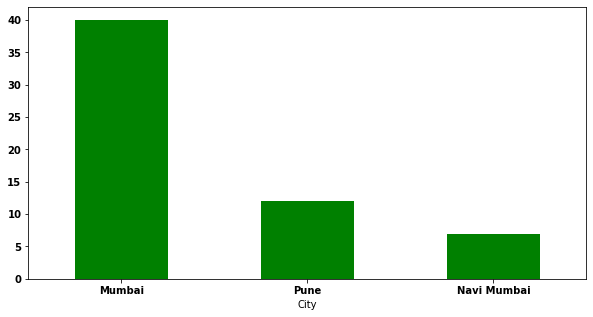

In [15]:
a=match_data.groupby(['City'])['ID'].count().sort_values(ascending=False)
print(a)
a.plot(kind="bar",figsize=(10,5),color="green")
plt.xticks(rotation=0,fontsize=10,fontweight="bold")
plt.yticks(fontsize=10,fontweight="bold")
plt.show()

Venue
Dr DY Patil Sports Academy, Mumbai               18
Wankhede Stadium, Mumbai                         16
Brabourne Stadium, Mumbai                        13
Maharashtra Cricket Association Stadium, Pune    12
Name: ID, dtype: int64


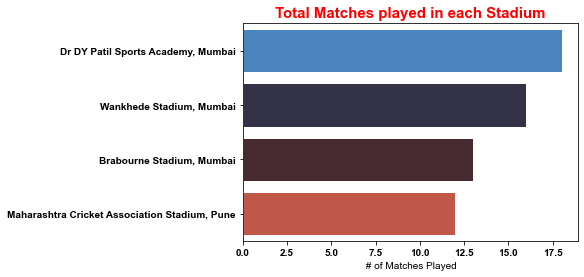

In [16]:
print(match_data.groupby(['Venue'])['ID'].count().sort_values(ascending=False))

Stadium=match_data['Venue'].value_counts()
ax=plt.axes()
# ax.set(facecolor = 'black')
sns.set(rc={'figure.figsize':(8,6)},style='darkgrid')
ax.set_title("Total Matches played in each Stadium",fontsize=15,fontweight="bold",color="red")
sns.barplot(y=Stadium.index,x=Stadium,orient='h',palette='icefire')
plt.xlabel(" # of Matches Played")
plt.ylabel(None)
plt.yticks(fontsize=10,fontweight="bold")
plt.xticks(fontsize=10,fontweight="bold")
plt.show()

In [17]:
# import dataframe_image as dfi

# Stadium1=Stadium.style.background_gradient()

# dfi.export(Stadium1, 'df_styled.png')

# df.dfi.export('df.png')

# df_styled.export_png('df_styled.png)

# **Qn-02** 

In which stadium ,which team most of the matches had won 

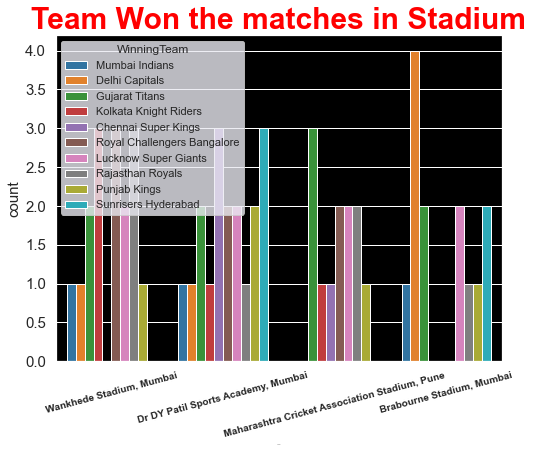

In [18]:
ax=plt.axes()
ax.set(facecolor = 'black')

sns.countplot(x='Venue',hue='WinningTeam',data=match_data,palette="tab10")

plt.xticks(rotation=15,fontsize=10,fontweight="bold")
plt.yticks(fontsize=15)

plt.rcParams['figure.figsize'] = (13, 9)

ax.set_title("Team Won the matches in Stadium",fontsize=30,fontweight="bold",color="red")

plt.xlabel("\n Teams",fontsize=0)
plt.ylabel('count',fontsize=15)
plt.show()

In [19]:
match_data.groupby(['Venue','WinningTeam'])['WinningTeam'].agg(['count']).rename(columns={'count':"Won_Match"}).reset_index()


,Venue,WinningTeam,Won_Match
0,"Brabourne Stadium, Mumbai",Delhi Capitals,4
1,"Brabourne Stadium, Mumbai",Gujarat Titans,2
2,"Brabourne Stadium, Mumbai",Lucknow Super Giants,2
3,"Brabourne Stadium, Mumbai",Mumbai Indians,1
4,"Brabourne Stadium, Mumbai",Punjab Kings,1
5,"Brabourne Stadium, Mumbai",Rajasthan Royals,1
6,"Brabourne Stadium, Mumbai",Sunrisers Hyderabad,2
7,"Dr DY Patil Sports Academy, Mumbai",Chennai Super Kings,3
8,"Dr DY Patil Sports Academy, Mumbai",Delhi Capitals,1
9,"Dr DY Patil Sports Academy, Mumbai",Gujarat Titans,2


In [20]:
# import dataframe_image as dfi

# style=aa.style.background_gradient()

# dfi.export(style, 'df2.png')

# df.dfi.export('df.png')

# df_styled.export_png('df_styled.png)

# **Qn-03** 

## how many matches were played by each team?

## In which stadium how many matches were played by each team ?

Team1
Chennai Super Kings            12
Delhi Capitals                 12
Gujarat Titans                 12
Kolkata Knight Riders          12
Lucknow Super Giants           12
Mumbai Indians                 12
Punjab Kings                   11
Rajasthan Royals               12
Royal Challengers Bangalore    12
Sunrisers Hyderabad            11
Name: Team1, dtype: int64

 Total Number Of Teams= 10


C:\Users\ketul\AppData\Local\Temp\ipykernel_18448\3741846485.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=combine.append(combine2)


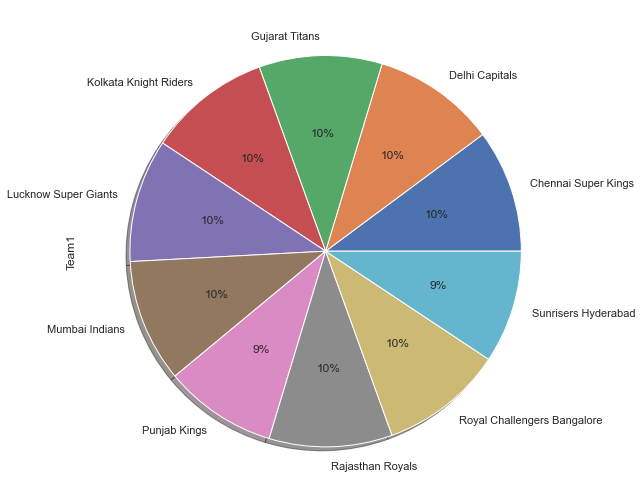

In [21]:

combine=match_data.loc[:,["Venue",'Team1']]

combine2=match_data.loc[:,["Venue",'Team2']]

combine2.rename(columns = {'Team2':'Team1'}, inplace = True)

result=combine.append(combine2)

print(result.groupby(['Team1'])['Team1'].count())

result.groupby(['Team1'])['Team1'].count().plot(kind="pie",figsize=(13,9),autopct='%1.0f%%', shadow=True)

Team=len(match_data['Team1'].unique())

print(f"\n Total Number Of Teams= {Team}")

In [22]:
## In which stadium how many matches were played by each team ?

combine=match_data.loc[:,["Venue",'Team1']]

combine2=match_data.loc[:,["Venue",'Team2']]

combine2.rename(columns = {'Team2':'Team1'}, inplace = True)

result=combine.append(combine2)

result.groupby(['Venue','Team1'])['Team1'].agg(['count']).rename(columns={'count':"Played_Matches"}).reset_index()


# import dataframe_image as dfi

# style=ab.style.background_gradient()

# dfi.export(style, 'ab.png')

C:\Users\ketul\AppData\Local\Temp\ipykernel_18448\503817781.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=combine.append(combine2)


,Venue,Team1,Played_Matches
0,"Brabourne Stadium, Mumbai",Chennai Super Kings,2
1,"Brabourne Stadium, Mumbai",Delhi Capitals,4
2,"Brabourne Stadium, Mumbai",Gujarat Titans,3
3,"Brabourne Stadium, Mumbai",Kolkata Knight Riders,3
4,"Brabourne Stadium, Mumbai",Lucknow Super Giants,2
5,"Brabourne Stadium, Mumbai",Mumbai Indians,3
6,"Brabourne Stadium, Mumbai",Punjab Kings,3
7,"Brabourne Stadium, Mumbai",Rajasthan Royals,1
8,"Brabourne Stadium, Mumbai",Royal Challengers Bangalore,2
9,"Brabourne Stadium, Mumbai",Sunrisers Hyderabad,3


# Q4  

## Toss Decision by Team

                     TossWinner TossDecision  count
0           Chennai Super Kings        field      4
1                Delhi Capitals        field      8
2                Gujarat Titans          bat      3
3                Gujarat Titans        field      5
4         Kolkata Knight Riders        field      7
5          Lucknow Super Giants          bat      1
6          Lucknow Super Giants        field      4
7                Mumbai Indians        field      7
8                  Punjab Kings          bat      1
9                  Punjab Kings        field      2
10             Rajasthan Royals        field      1
11  Royal Challengers Bangalore          bat      2
12  Royal Challengers Bangalore        field      5
13          Sunrisers Hyderabad        field      9


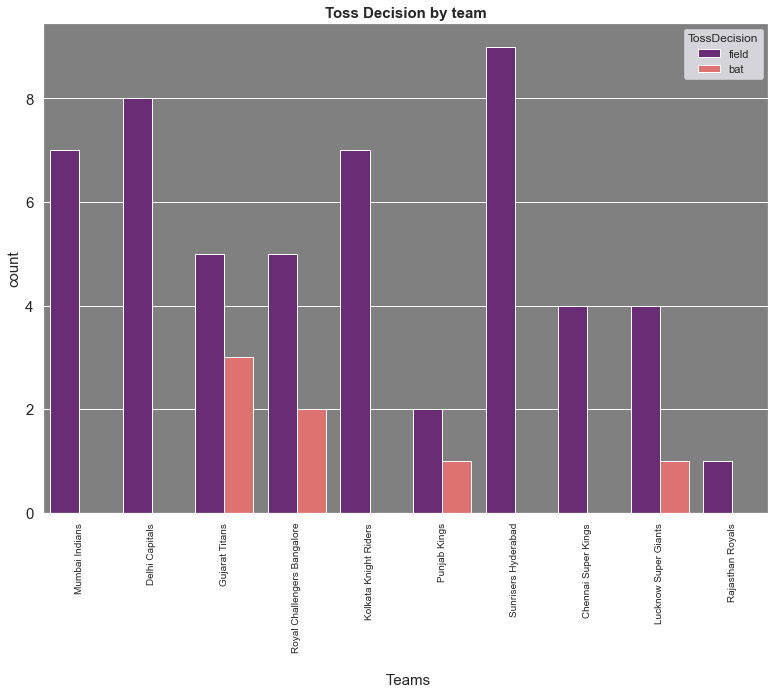

In [23]:
print(match_data.groupby(['TossWinner','TossDecision'])['TossWinner'].agg(['count']).sort_values(by=["TossWinner"]).reset_index())

ax=plt.axes()
ax.set(facecolor = 'gray')
sns.countplot(x='TossWinner',hue=('TossDecision'),data=match_data,palette="magma")
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.rcParams['figure.figsize'] = (13, 9)
ax.set_title("Toss Decision by team",fontsize=15,fontweight="bold")

plt.xlabel("\n Teams",fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()


# import dataframe_image as dfi

# style=cc.style.background_gradient()

# dfi.export(style, 'cc.png')


# Qn-5


## What is the toss decision in this season?

TossDecision
bat       7
field    52
Name: TossWinner, dtype: int64



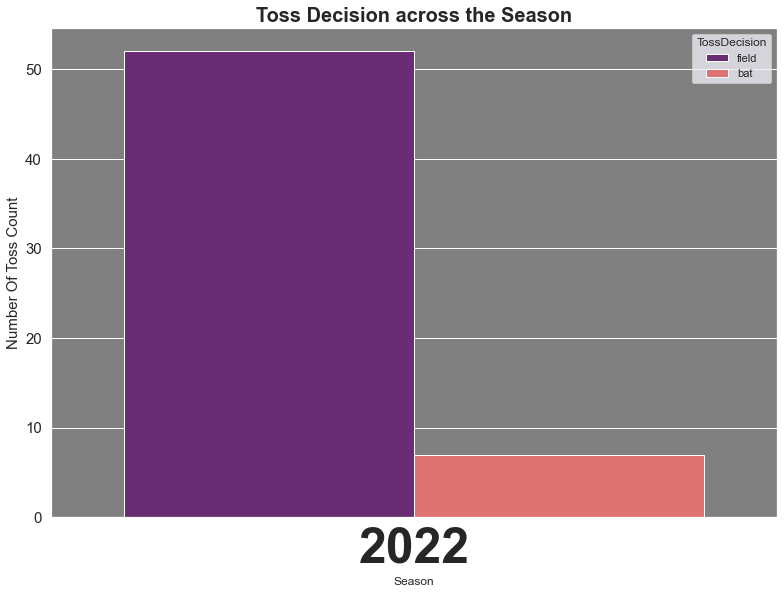

In [24]:
print(match_data.groupby(['TossDecision'])['TossWinner'].count())

print("")

ax=plt.axes()
ax.set(facecolor = 'gray')
sns.countplot(x='Season',hue='TossDecision',data=match_data,palette="magma")
plt.xticks(fontsize=50,fontweight="bold")
plt.yticks(fontsize=15)
sns.set(rc={'figure.figsize':(6,9)},style='darkgrid')

ax.set_title("Toss Decision across the Season",fontsize=20,fontweight="bold")

plt.ylabel('Number Of Toss Count',fontsize=15)
plt.show()

# QN-6 

## Winning The match after toss

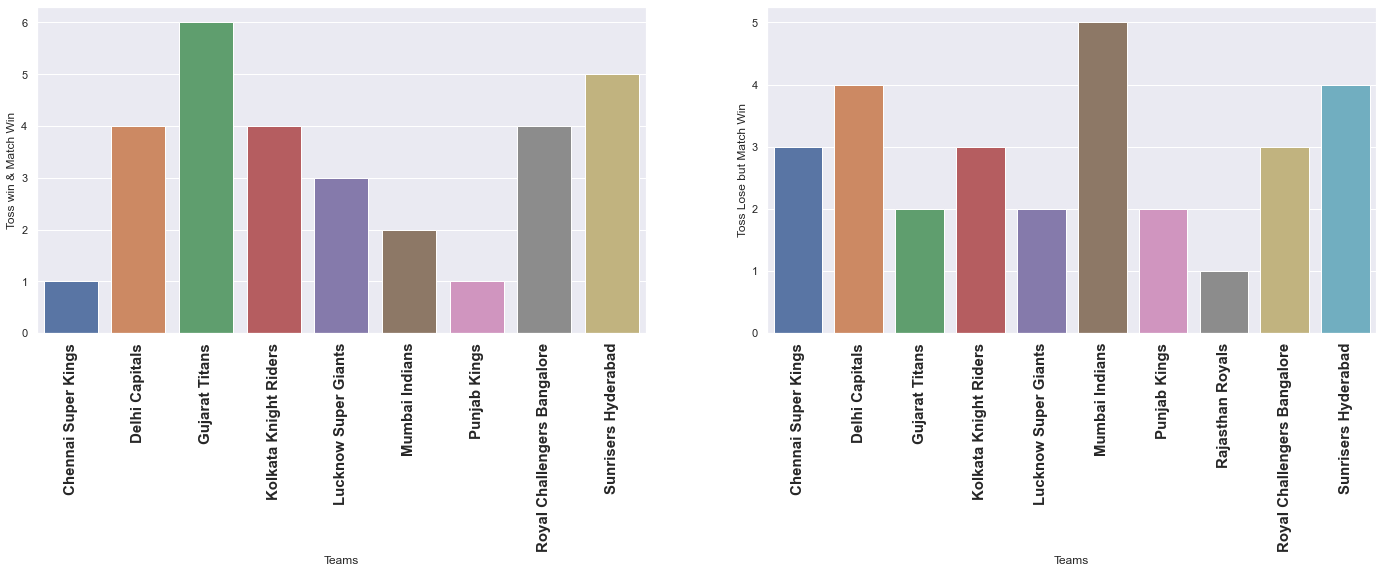

In [25]:
win_win=match_data[match_data['TossWinner']==match_data['WinningTeam']].groupby('WinningTeam')['WinningTeam'].agg(['count']).sort_values(by="WinningTeam").reset_index()
win_lose=match_data[match_data['TossWinner']!=match_data['WinningTeam']].groupby('TossWinner')['WinningTeam'].agg(['count']).reset_index()

win_win.columns=['Teams','Toss win & Match Win']
win_lose.columns=['Teams','Toss Lose but Match Win']

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(24,6))

sns.barplot(x='Teams',y='Toss win & Match Win',data=win_win,ax=axes[0]).set_xticklabels(
    win_win['Teams'],rotation=90,fontsize=15,fontweight='bold')


sns.barplot(x='Teams',y='Toss Lose but Match Win',data=win_lose,ax=axes[1]).set_xticklabels(
    win_lose['Teams'],rotation=90,fontsize=15,fontweight='bold')

plt.show()

# Qn-7 
    
## Win - lose ratio after win the toss

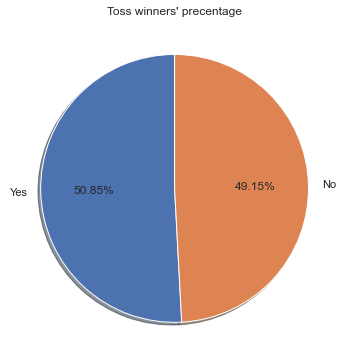

In [26]:


#obtain toss winners in the match

winner = match_data[match_data['TossWinner']==match_data['WinningTeam']]

total=len(match_data['ID'])

labels=['Yes','No']

#pie plot
plt.pie([len(winner),(total-len(winner))],labels=labels,autopct='%1.2f%%', shadow=True, startangle=90)
sns.set(rc={'figure.figsize':(5,9)},style='darkgrid')
plot = plt.gcf()
plt.title("Toss winners' precentage")
plt.show()

# **Qn-08**

## (i) Won the match with biggest margin

## (ii) Won the match with biggest Wickets



In [27]:
win_by_runs_data=match_data[match_data['WonBy']!="Wickets"].reset_index()

print(f"total record {len(win_by_runs_data)}")

win_by_runs_data.loc[:,("WinningTeam","Margin")].sort_values(by="Margin",ascending=False).head(1)

total record 30


,WinningTeam,Margin
2,Chennai Super Kings,91


In [28]:
win_by_wickets_data=match_data[match_data['WonBy']=="Wickets"].reset_index()

print(f"total record {len(win_by_wickets_data)}")

win_by_wickets_data.loc[:,("WinningTeam","Margin")].sort_values(by="Margin",ascending=False).head(2)

total record 29


,WinningTeam,Margin
9,Sunrisers Hyderabad,9
11,Delhi Capitals,9


# **Qn-09**

## How many Super-over played in this season?

## If any super over than Who had won?

In [29]:
res=sum(match_data['SuperOver']=="Y")

print(f"Super-over = {res}")

Super-over = 0


# **Qn-10**

## which player most of times man of match in this season?

In [30]:
match_data.groupby('Player_of_Match')['Player_of_Match'].count().sort_values(ascending=False).head(1)

Player_of_Match
Kuldeep Yadav    4
Name: Player_of_Match, dtype: int64

# **Qn-11** 

## The Lowest total defended and Highest total chased by each team


In [31]:
## Highest total chased

new_data[new_data['second_ings_score']>new_data['first_ings_score']].sort_values(by="second_ings_score",ascending=False).head(1)


,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
6,7,"March 31,2022","Brabourne Stadium, Mumbai",Chennai,Lucknow,Group,Lucknow,Field,210,7,211,4,Lucknow,Wickets,6,Evin Lewis,Quinton de Kock,61,Ravi Bishnoi,2--24


In [32]:
# Lowest total defended

new_data[new_data['second_ings_score']<new_data['first_ings_score']].sort_values(by="second_ings_score",ascending=False).tail(1)

# import dataframe_image as dfi

# style=bg.style.background_gradient()

# dfi.export(style, 'bg.png')

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
56,57,"May 10,2022","Maharashtra Cricket Association Stadium,Pune",Lucknow,Gujarat,Group,Gujarat,Bat,144,4,82,10,Gujarat,Runs,62,Shubman Gill,Shubman Gill,63,Rashid Khan,4--24


In [33]:
merge_data = match_data[['ID','MatchNumber','Team1', 'Team2','TossWinner', 'TossDecision','WinningTeam','WonBy', 'Margin']].merge(ball_data, left_on = 'ID', right_on = 'ID', how = 'inner').drop('ID', axis = 1)

merge_data.head()

,MatchNumber,Team1,Team2,TossWinner,TossDecision,WinningTeam,WonBy,Margin,innings,overs,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,59,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,Wickets,5,1,0,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,59,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,Wickets,5,1,0,...,NaN,0,0,0,0,1,DP Conway,lbw,NaN,Chennai Super Kings
2,59,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,Wickets,5,1,0,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
3,59,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,Wickets,5,1,0,...,wides,0,1,1,0,0,NaN,NaN,NaN,Chennai Super Kings
4,59,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,Wickets,5,1,0,...,NaN,0,0,0,0,1,MM Ali,caught,HR Shokeen,Chennai Super Kings


# Qn-12

## Most runs scored in 20th and19th overs

In [34]:
# ball_data.head()

over_19_20=merge_data[merge_data['overs'].isin([18,19])]

over_19_20.groupby('overs')['total_run'].sum().reset_index()


,overs,total_run
0,18,1122
1,19,1060


# Qn-13

## Most Sixes and Most Four by individual and teams

In [35]:
## Total Sixes And Fours

sixes = merge_data[merge_data['batsman_run']==6]['ballnumber'].count()
fours = merge_data[merge_data['batsman_run']==4]['ballnumber'].count()

print("Total sixes in tournament =",sixes)
print("\n Total Fours in tournament =",fours)

Total sixes in tournament = 835

 Total Fours in tournament = 1625


## Most Sixes By player

In [36]:

merge_data[merge_data['batsman_run']==6].groupby('batter')['batsman_run'].agg(['count','sum']).sort_values(by='sum',ascending=False).reset_index().head(1)

,batter,count,sum
0,JC Buttler,37,222


## Most Fours By player

In [37]:
merge_data[merge_data['batsman_run']==4].groupby('batter')['batsman_run'].agg(['count','sum']).sort_values(by='sum',ascending=False).reset_index().head(1)

,batter,count,sum
0,JC Buttler,57,228


##  Most Sixes and Most Four by  teams

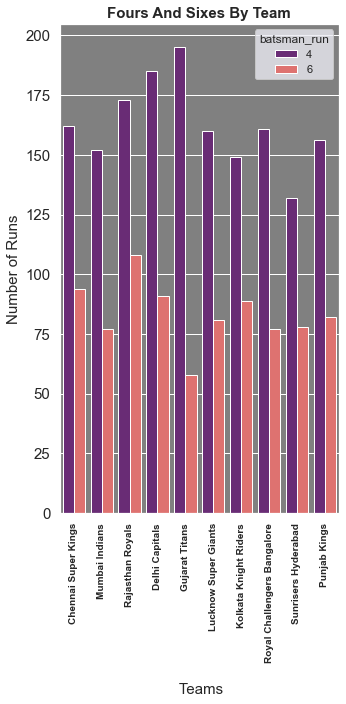

In [38]:

# merge_data[merge_data['batsman_run']==6].groupby('batter')['batsman_run'].sum().sort_values(ascending=False).reset_index()

fours_sixes=merge_data[merge_data['batsman_run'].isin([4,6])]

ax=plt.axes()
ax.set(facecolor = 'gray')
sns.countplot(x='BattingTeam',hue=('batsman_run'),data=fours_sixes,palette="magma")
plt.xticks(rotation=90,fontsize=10,fontweight='bold')
plt.yticks(fontsize=15)
plt.rcParams['figure.figsize'] = (13, 9)
ax.set_title("Fours And Sixes By Team",fontsize=15,fontweight="bold")

plt.xlabel("\n Teams",fontsize=15)
plt.ylabel('Number of Runs',fontsize=15)
plt.show()


# Qn-14

## >50 Score by player

In [39]:
dd=merge_data.groupby(['batter','MatchNumber'])['total_run'].sum().sort_values(ascending=False).reset_index()
dd[dd.total_run>50]

,batter,MatchNumber,total_run
0,JC Buttler,34,117
1,KL Rahul,37,111
2,JC Buttler,30,108
3,KL Rahul,26,108
4,JC Buttler,9,103
...,...,...,...
95,VR Iyer,14,52
96,DJ Hooda,12,51
97,S Dube,7,51
98,MS Dhoni,1,51


## >100 Score by player

In [40]:
dd[dd.total_run>100]

,batter,MatchNumber,total_run
0,JC Buttler,34,117
1,KL Rahul,37,111
2,JC Buttler,30,108
3,KL Rahul,26,108
4,JC Buttler,9,103
5,S Dube,22,102
6,F du Plessis,3,102
7,DA Warner,50,101
8,RD Gaikwad,46,101


# Qn-15

## Highest Run scorer in power play and death overs



In [41]:
# Power play highest score

powerplay=merge_data[merge_data['overs'].isin([0,1,2,3,4,5])]

powerplay.groupby(['MatchNumber','innings'])['total_run'].sum().sort_values(ascending=False).reset_index().head(1)



,MatchNumber,innings,total_run
0,32,2,81


In [42]:
# Last Over highest score

last_over=merge_data[merge_data['overs'].isin([19])]

last_over.groupby(['MatchNumber','innings'])['total_run'].sum().sort_values(ascending=False).reset_index().head(1)

,MatchNumber,innings,total_run
0,40,2,25


# remaining Qn


● Most 50+ 100+ partnerships by a duo

● Most 50+ 100+ partnerships by team

In [44]:
new_data.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [45]:
new_data.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

In [46]:
match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1304105,Mumbai,2022-05-12,2022,59,Chennai Super Kings,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5,DR Sams,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'RV Utha...","['Ishan Kishan', 'RG Sharma', 'DR Sams', 'Tila...",Chirra Ravikanthreddy,CB Gaffaney
1,1304104,Navi Mumbai,2022-05-11,2022,58,Rajasthan Royals,Delhi Capitals,"Dr DY Patil Sports Academy, Mumbai",Delhi Capitals,field,N,Delhi Capitals,Wickets,8,MR Marsh,"['YBK Jaiswal', 'JC Buttler', 'R Ashwin', 'D P...","['KS Bharat', 'DA Warner', 'MR Marsh', 'RR Pan...",NA Patwardhan,Nitin Menon
2,1304103,Pune,2022-05-10,2022,57,Gujarat Titans,Lucknow Super Giants,"Maharashtra Cricket Association Stadium, Pune",Gujarat Titans,bat,N,Gujarat Titans,Runs,62,Shubman Gill,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['Q de Kock', 'KL Rahul', 'DJ Hooda', 'KS Shar...",KN Ananthapadmanabhan,MA Gough
3,1304102,Navi Mumbai,2022-05-09,2022,56,Kolkata Knight Riders,Mumbai Indians,"Dr DY Patil Sports Academy, Mumbai",Mumbai Indians,field,N,Kolkata Knight Riders,Runs,52,JJ Bumrah,"['VR Iyer', 'AM Rahane', 'N Rana', 'SS Iyer', ...","['RG Sharma', 'Ishan Kishan', 'Tilak Varma', '...",CB Gaffaney,GR Sadashiv Iyer
4,1304101,Navi Mumbai,2022-05-08,2022,55,Chennai Super Kings,Delhi Capitals,"Dr DY Patil Sports Academy, Mumbai",Delhi Capitals,field,N,Chennai Super Kings,Runs,91,DP Conway,"['RD Gaikwad', 'DP Conway', 'S Dube', 'AT Rayu...","['DA Warner', 'KS Bharat', 'MR Marsh', 'RR Pan...",Nitin Menon,R Pandit


In [47]:
ball_data.head(10)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1304105,1,0,1,RD Gaikwad,DR Sams,DP Conway,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,1304105,1,0,2,DP Conway,DR Sams,RD Gaikwad,NaN,0,0,0,0,1,DP Conway,lbw,NaN,Chennai Super Kings
2,1304105,1,0,3,MM Ali,DR Sams,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
3,1304105,1,0,4,MM Ali,DR Sams,RD Gaikwad,wides,0,1,1,0,0,NaN,NaN,NaN,Chennai Super Kings
4,1304105,1,0,5,MM Ali,DR Sams,RD Gaikwad,NaN,0,0,0,0,1,MM Ali,caught,HR Shokeen,Chennai Super Kings
5,1304105,1,0,6,RV Uthappa,DR Sams,RD Gaikwad,wides,0,1,1,0,0,NaN,NaN,NaN,Chennai Super Kings
6,1304105,1,0,7,RV Uthappa,DR Sams,RD Gaikwad,wides,0,1,1,0,0,NaN,NaN,NaN,Chennai Super Kings
7,1304105,1,0,8,RV Uthappa,DR Sams,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
8,1304105,1,0,9,RV Uthappa,DR Sams,RD Gaikwad,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
9,1304105,1,1,1,RV Uthappa,JJ Bumrah,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


In [51]:
aa=ball_data[ball_data["ID"]==1304104]

aa.groupby(['innings',"batter",'non-striker'])['total_run'].agg(['sum']).reset_index().rename(
     columns={'sum':'score'}).sort_values(by="innings",ascending=False)




,innings,batter,non-striker,score
18,2,RR Pant,DA Warner,13
17,2,MR Marsh,DA Warner,92
16,2,KS Bharat,DA Warner,0
15,2,DA Warner,RR Pant,4
14,2,DA Warner,MR Marsh,52
10,1,SV Samson,D Padikkal,6
13,1,YBK Jaiswal,R Ashwin,17
12,1,YBK Jaiswal,JC Buttler,2
11,1,TA Boult,HE van der Dussen,4
0,1,D Padikkal,HE van der Dussen,1


In [ ]:
dou.apply(lambda x:dou['batter'].join("-"))